In [1]:
import numpy as np
from scipy.integrate import odeint

In [2]:
import matplotlib.pyplot as plt

In [3]:
h = 3
A = 10
k = 1.9
l = 0.3
cp = 840
rho = 2300
C = cp*rho*A*l

coff1 = h*A
coff2 = (k*A) / (l/2)

def cal_T2(T1,T3):
    return (coff1*T1 + coff2*T3) / (coff1 + coff2)
def cal_T4(T5,T3):
    return (coff1*T5 + coff2*T3) / (coff1 + coff2)
def func_T5(t):
    return np.sin((t-3600*12)/(60*60*24)*(2*np.pi))*3+25
def dTdt(x, t):
    T1 = 20
    T5 = func_T5(t)
    T3 = x[0]    
    T2 = cal_T2(T1,T3)
    T4 = cal_T4(T5,T3)
    dT3dt = (coff2/C) * (T2-2*T3+T4)
    return [dT3dt]

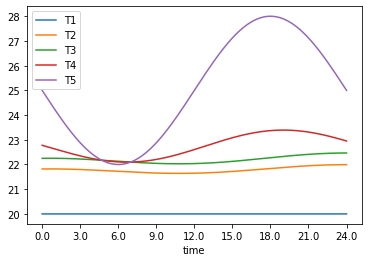

In [4]:
t_span = np.linspace(0, (60*60*24)*1, (60*60*24)+1)

# Initial condition
T3_0 = 22.25

solution = odeint(dTdt, [T3_0], t_span)
T1 = np.ones_like(t_span)*20
T5 = func_T5(t_span)
T3 = solution[:, 0]
T2 = cal_T2(T1,T3)
T4 = cal_T4(T5,T3)

# plot
plt.plot(t_span, T1, label='T1')
plt.plot(t_span, T2, label='T2')
plt.plot(t_span, T3, label='T3')
plt.plot(t_span, T4, label='T4')
plt.plot(t_span, T5, label='T5')
plt.legend();
plt.xticks(t_span[::60*60*3],t_span[::60*60*3]/3600)
plt.xlabel('time'); 